# Análisis WSN
Se presenta la documentación del código empleado para analizar las mediciones de variables ambientales tomadas en un cultivo de Cacao en el corregimiento de Cornejo, San Cayetano (Norte deSantander)




Se Importan las librerias necesarias para el análisis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import Algmods as Af
from scipy import stats

pd.options.display.max_rows = 10

Se importan los datos desde el archivo WSN.csv

In [2]:
wsn = pd.read_csv('medidas.csv')
wsn

,IDMEDIDA,NODO,TEMPERATURA,HUMEDAD RELATIVA,HUMEDAD DE LA TIERRA,NIVEL UV,INTENSIDAD LUMÍNICA,TIME
0,1,2,27,19,74.97,0,5853,2018-05-09 09:38:00
1,2,2,28,19,72.72,0,5865,2018-05-09 09:49:00
2,3,2,28,19,72.56,0,5859,2018-05-09 09:50:00
3,4,2,28,19,72.40,0,5859,2018-05-09 09:51:00
4,5,2,28,19,72.08,0,5859,2018-05-09 09:52:00
...,...,...,...,...,...,...,...,...
22808,22809,5,33,29,6.43,1,5865,2018-06-11 06:15:00
22809,22810,2,31,17,0.82,0,5853,2018-06-11 06:16:00
22810,22811,5,33,29,6.43,0,5865,2018-06-11 06:16:00
22811,22812,2,32,17,0.82,0,5853,2018-06-11 06:17:00


wsn=Af.impbd('WSN','medidas')

*Af.filtro* realiza un filtro de valores faltantes y repetidos en el dataset, dejando únicamente los pares de vectores de
de datos de los nodos dos y cinco registrados en un minuto determinado

In [3]:
%matplotlib inline
# Af.filtrop genera datos que para visualizar la cantidad de valores faltantes y medidos
# por los nodos 2 y 5
MDNN,CDN,MA,CA,MFN,CFN,WSN=Af.filtrop(wsn)
# WSN=Af.filtro(wsn)
print('La serie general tiene', len(wsn), 'valores')
print('La serie filtrada tiene', len(WSN), 'observaciones')
WSN

Faltantes nodo 2:  36022
Faltantes nodo 5:  35280
La serie general tiene 22813 valores
La serie filtrada tiene 21164 observaciones


,IDMEDIDA,NODO,TEMPERATURA,HUMEDAD RELATIVA,HUMEDAD DE LA TIERRA,NIVEL UV,INTENSIDAD LUMÍNICA,TIME
0,38,5,30,58,80.42,0,5829,2018-05-09 10:25:00
1,39,2,29,18,62.61,0,5853,2018-05-09 10:25:00
2,40,5,30,57,73.20,0,5829,2018-05-09 10:26:00
3,41,2,29,18,62.61,0,5853,2018-05-09 10:26:00
4,42,5,30,57,67.75,0,5841,2018-05-09 10:27:00
...,...,...,...,...,...,...,...,...
21159,22809,5,33,29,6.43,1,5865,2018-06-11 06:15:00
21160,22810,2,31,17,0.82,0,5853,2018-06-11 06:16:00
21161,22811,5,33,29,6.43,0,5865,2018-06-11 06:16:00
21162,22812,2,32,17,0.82,0,5853,2018-06-11 06:17:00


Se realiza la descripción estadística de la muestra general

In [4]:
WSN.describe()

,IDMEDIDA,NODO,TEMPERATURA,HUMEDAD RELATIVA,HUMEDAD DE LA TIERRA,NIVEL UV,INTENSIDAD LUMÍNICA
count,21164.000000,21164.000000,21164.000000,21164.000000,21164.000000,21164.000000,21164.000000
mean,10838.746929,3.500000,27.534256,45.893073,33.709783,0.019325,3089.160556
std,6272.639449,1.500035,4.961517,23.466546,29.186186,0.194074,2810.595105
min,38.000000,2.000000,-20.000000,5.000000,0.820000,0.000000,0.000000
25%,5411.750000,2.000000,24.000000,28.000000,9.160000,0.000000,0.000000
50%,10749.500000,3.500000,27.000000,39.000000,19.110000,0.000000,4398.000000
75%,16290.250000,5.000000,30.000000,60.000000,64.860000,0.000000,5829.000000
max,22813.000000,5.000000,60.000000,95.000000,90.220000,6.000000,5941.000000


Se obtiene la curtosis de las variables para saber forma de la distribución que presenta cada variable

In [5]:
WSN.iloc[:,[2,3,4,5,6]].kurtosis()

TEMPERATURA              14.305108
HUMEDAD RELATIVA         -0.615099
HUMEDAD DE LA TIERRA     -1.336804
NIVEL UV                293.662459
INTENSIDAD LUMÍNICA      -1.930976
dtype: float64

Se grafican los diagramas de cajas correspodientes a cada variable

C:\Users\Jergb\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Jergb\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Jergb\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Jergb\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Jergb\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

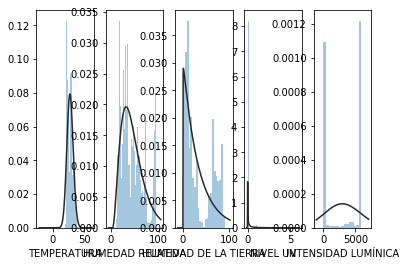

In [6]:
#%matplotlib qt
b=150
for a in range(2,7):
    b+=1
    plt.subplot(b)
    sns.distplot(WSN.iloc[:,a], kde=False, fit=stats.gamma);


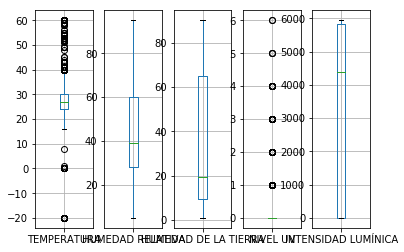

In [7]:
Af.wsnbp(WSN.iloc[:,2:7])

Grafico de stripplot, para ver la dispersón de los datos en cada variable

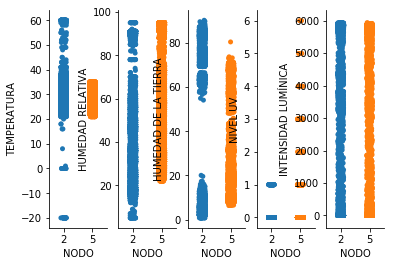

In [8]:
b=150
for a in range(2,7):
    b+=1
    plt.subplot(b)
    sns.stripplot(x='NODO', y=WSN.iloc[:,a], data=WSN, jitter=True)
    sns.despine()

In [9]:
Nodo2,Nodo5=Af.tablas(WSN) #Crea las tablas que se van a utilizar para el análisis

S evisualizan las graficas correpondientes a las mediciones del nodo "Node" (Nodo2 o Nodo5)

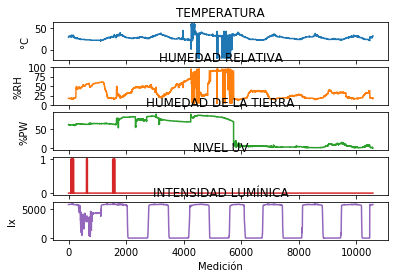

In [10]:
%matplotlib qt
Node=Nodo2
ax=Node.iloc[:,[2,3,4,5,6]].plot(subplots=True,sharex=False,legend=False,title=list(WSN.iloc[:,[2,3,4,5,6]].columns))
lis=['°C','%RH','%PW',' ','lx']
for a in range(5):
    ax[a].set_xlabel('Medición')
    ax[a].set_ylabel(lis[a])
plt.show()

Presenta información grafica de los valores faltantes, duplicados y medidos.

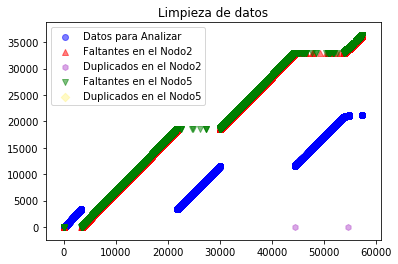

<Figure size 432x288 with 0 Axes>

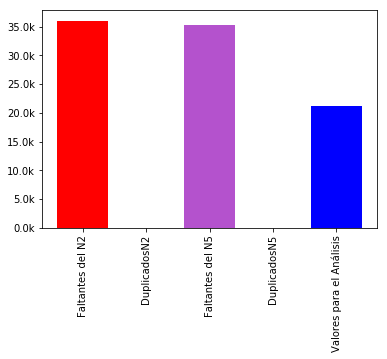

In [11]:
Af.datosplot(MDNN,CDN,MA,CA,MFN,CFN,WSN)

In [12]:
mahalNodos=Af.mahalM(Nodo2.iloc[:,2:7],Nodo5.iloc[:,2:7],WSN.iloc[:,2:7])
eucliNodos=Af.euclidea(Nodo2.iloc[:,2:7],Nodo5.iloc[:,2:7])

normal


Grafica de la distancias de Mahalanobis y Euclidea

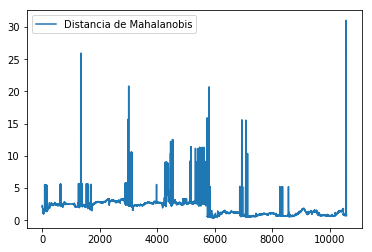

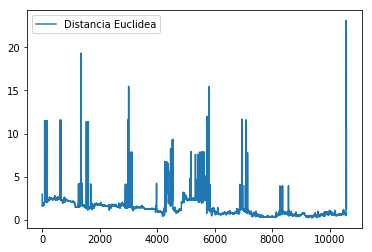

In [14]:
#,'o',label='Distancia de Mahalanobis'

plt.plot(mahalNodos,label='Distancia de Mahalanobis')
plt.legend()
plt.figure()
plt.plot(eucliNodos,label='Distancia Euclidea')
plt.legend()
plt.show()

C:\Users\Jergb\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Jergb\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


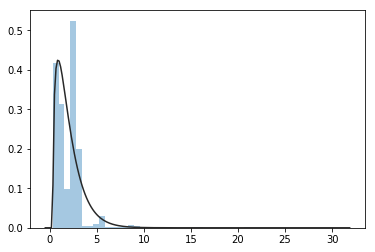

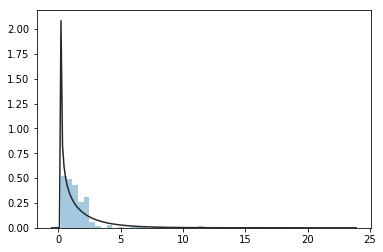

In [17]:
sns.distplot(mahalNodos, kde=False, fit=stats.chi2);
plt.figure()
sns.distplot(eucliNodos, kde=False, fit=stats.chi2);